In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [5]:
df=pd.read_csv('D:\MLProjects\credit card fraud 0\creditcard.csv')

In [6]:
df.head().style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [7]:
#df.isnull().sum()

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
#df.info()

<AxesSubplot:xlabel='Class', ylabel='count'>

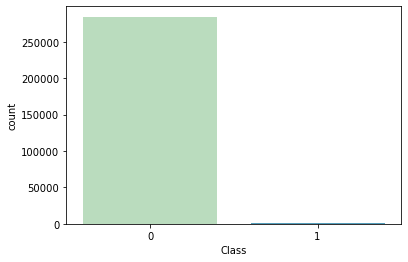

In [10]:
sns.countplot(x='Class',data=df,palette='GnBu')

<AxesSubplot:xlabel='Class', ylabel='Amount'>

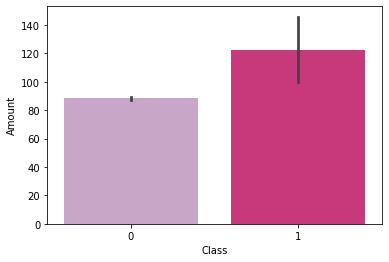

In [11]:
sns.barplot(x='Class',y='Amount',data=df,palette='PuRd')

<AxesSubplot:xlabel='Class', ylabel='Time'>

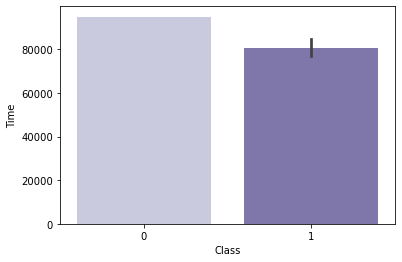

In [12]:
sns.barplot(x='Class',y='Time',data=df,palette='Purples')

In [13]:
#seperating data for analysis
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [14]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [15]:
#analyzing Amount column
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Under Samping

--we can also perform like this
normal_sample = normal.sample(n=492)
-now combine these two columns 
--data = pd.concat([normal_sample, fraud], axis=0)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [18]:
X= df.drop('Class',axis=1)
y= df.Class

In [19]:
#X1 = np.array(X)
#y1 = np.array(y)  

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101)

In [21]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler 

In [22]:
ns=RandomUnderSampler(0.8) #reduce it 0.8
X_train_ns,y_train_ns = ns.fit_resample(X_train,y_train)
print('the number of classes before the fit {}'.format(Counter(y_train)))
print('the number of classes after the fit {}'.format(Counter(y_train_ns)))

the number of classes before the fit Counter({0: 213238, 1: 367})
the number of classes after the fit Counter({0: 458, 1: 367})


C:\Users\Bhargav\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [23]:
from sklearn.ensemble import RandomForestClassifier as RFC
cls= RFC()
cls.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [24]:
ns=RandomUnderSampler(0.8) #reduce it 0.8
X_test_ns,y_test_ns = ns.fit_resample(X_test,y_test)

C:\Users\Bhargav\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [25]:
#checking the shape of test data
print(y_test_ns.shape)
print('\n\n')
print(X_test_ns.shape)

(281,)



(281, 30)


In [26]:
y_pred1 = cls.predict(X_test_ns)
print(classification_report(y_test_ns,y_pred1))
print(accuracy_score(y_test_ns,y_pred1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       156
           1       1.00      0.90      0.95       125

    accuracy                           0.95       281
   macro avg       0.96      0.95      0.95       281
weighted avg       0.96      0.95      0.95       281

0.9537366548042705


In [27]:
classes = ('Normal', 'Fraud')
classes

('Normal', 'Fraud')

Text(69.0, 0.5, 'Predicted class')

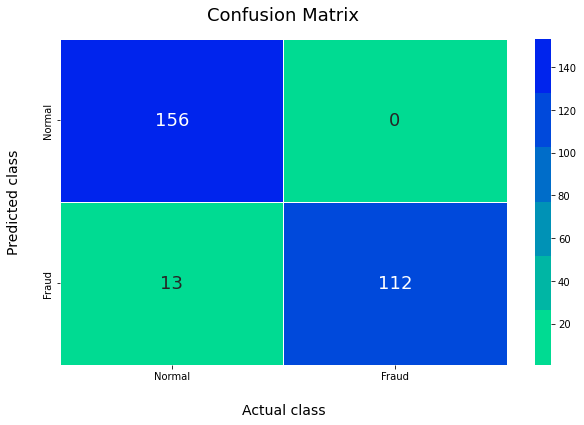

In [28]:
cm = confusion_matrix(y_test_ns,y_pred1)
fig,ax= plt.subplots(figsize=(10,6))#figsize=(10,6)
a=sns.color_palette("winter_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
 #annot_kws: settings about annotations
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)

In [29]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
bnb = BernoulliNB()

In [30]:
bnb.fit(X_train_ns,y_train_ns)

BernoulliNB()

In [31]:
y_pred1=bnb.predict(X_test_ns)

In [32]:
print(classification_report(y_test_ns,y_pred1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       156
           1       1.00      0.85      0.92       125

    accuracy                           0.93       281
   macro avg       0.95      0.92      0.93       281
weighted avg       0.94      0.93      0.93       281



In [33]:
#finding the optimal threshold value
pred = []
for model in [cls,bnb]:
    pred.append(pd.Series(model.predict_proba(X_test_ns)[:,1]))
    
    final_prediction = pd.concat(pred, axis=1).mean(axis=1)
    
    print('Test ROC-AUC: {}'.format(roc_auc_score(y_test_ns,y_pred1)))

Test ROC-AUC: 0.9239999999999999
Test ROC-AUC: 0.9239999999999999


In [34]:
pd.concat(pred,axis=1)

,0,1
0,0.02,0.063323
1,0.09,0.001177
2,0.03,0.029285
3,0.04,0.000334
4,0.03,0.000944
...,...,...
276,0.45,0.003418
277,1.00,0.999561
278,1.00,0.999858
279,1.00,0.999856


In [35]:
final_prediction

0      0.041662
1      0.045589
2      0.029642
3      0.020167
4      0.015472
         ...   
276    0.226709
277    0.999781
278    0.999929
279    0.999928
280    0.979910
Length: 281, dtype: float64

In [36]:
#roc curve-threhold values
fpr, tpr, thresholds = roc_curve(y_test_ns,final_prediction)
thresholds

array([1.99998818e+00, 9.99988183e-01, 9.99982063e-01, 9.99981918e-01,
       9.99980130e-01, 9.99978828e-01, 9.99976910e-01, 9.99920184e-01,
       9.99914712e-01, 9.99870626e-01, 9.99870607e-01, 3.26694597e-01,
       3.09921690e-01, 2.87824299e-01, 2.79571564e-01, 2.75943198e-01,
       2.45007419e-01, 2.26150311e-01, 1.85035469e-01, 1.81866036e-01,
       1.57177081e-01, 1.46178296e-01, 1.35138304e-01, 1.30008882e-01,
       1.20125289e-01, 1.20051755e-01, 1.20008379e-01, 1.19996028e-01,
       6.14040850e-02, 6.03826629e-02, 5.06022606e-02, 5.00949610e-02,
       4.50315990e-02, 4.48787147e-02, 4.00022659e-02, 3.82989231e-02,
       2.53104009e-02, 2.50323481e-02, 4.41745044e-08])

In [37]:
#now im calculating the accuracy score for threshold value
accuracy = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy.append(accuracy_score(y_test_ns,y_pred,normalize=True))
    
accuracy = pd.concat([pd.Series(thresholds),pd.Series(accuracy)],axis=1)
accuracy.columns=['thresholds','accuracy']
accuracy.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy.head()

,thresholds,accuracy
14,0.279572,0.946619
12,0.309922,0.946619
11,0.326695,0.943060
17,0.226150,0.943060
16,0.245007,0.943060


In [38]:
#plotting the roc curve using the fpr and tpr values 
def plot_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1], color='darkblue') #linestyle = '-'
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

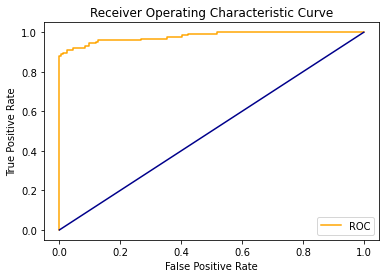

In [39]:
plot_curve(fpr,tpr)

# OverSampling

In [40]:
from sklearn.utils import resample

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

In [42]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

In [43]:
#Seperating fraud and normal transaction
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

In [44]:
print(not_fraud.shape)
print(fraud.shape)

(213228, 31)
(377, 31)


In [45]:
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in normal/not_fraud sample
                          random_state=27) # reproducible results

In [46]:
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [47]:
# check new class counts
upsampled.Class.value_counts()

0    213228
1    213228
Name: Class, dtype: int64

In [48]:
upsampled.shape

(426456, 31)

In [49]:
#
X_train = upsampled.drop('Class', axis=1)
y_train = upsampled.Class

In [50]:
cls.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred = cls.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71087
           1       0.95      0.72      0.82       115

    accuracy                           1.00     71202
   macro avg       0.98      0.86      0.91     71202
weighted avg       1.00      1.00      1.00     71202



# Using Smote

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
X = df.drop('Class', axis=1)
y = df.Class

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

In [56]:
oversample = SMOTE()

In [57]:
X_train, y_train =oversample.fit_resample(X_train, y_train)

In [58]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier() #max_depth=2, random_state=42,n_estimators=10

In [59]:
cls.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
y_pred = cls.predict(X_test)

In [63]:
print(classification_report(y_test,y_pred))
print('\n\n')
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71087
           1       0.92      0.77      0.83       115

    accuracy                           1.00     71202
   macro avg       0.96      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202




0.9995084407741356


In [65]:
#print("Train accuracy",rfc.score(X_train,y_train))